In [9]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import random

## Step 1: Generating mandelbrot set

In [6]:
def mandelbrot(dx , nmax , xbounds=(-2.25 , 1), ybounds= (-1.5,1.5)):
    x1, x2 = xbounds
    y1, y2 = ybounds
    xs = np.arange(x1, x2 + dx, dx)
    ys = np.arange(y1, y2 + dx, dx)
    coordinates = [(x,y) for x in xs for y in ys]
    mandelbrot = []
  
    for coordinate in coordinates:
        c = complex(coordinate[0], coordinate[1])
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        term = (c.real, c.imag , height) 
        mandelbrot.append(term)

    return np.array(mandelbrot)

    

 #### Visualizing

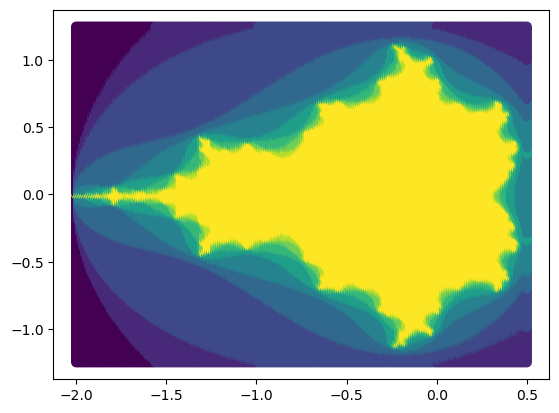

In [68]:
dx = 0.01
xrange = (-2, 0.5)
yrange = (-1.25,1.25)
nmax = 10

#sety = mandelbrot( dx=dx ,nmax = nmax)
sety = mandelbrot(dx ,nmax, xrange, yrange)

x, y , c = sety[:, 0], sety[:, 1], sety[:,2]


plt.scatter(x,y, c=c)


In [97]:
def MonteCarlo(iterations, sample, xlen, ylen):
    Data = mandelbrot(dx ,iterations, xrange, yrange)
    counter = 0
    Random_Point = random.choices(list(Data[:,2]), k = sample) # changed it to choices since we are considering uniform
        # distribution meaning every point is equally likely to be pulled. If we take random.sample it implies the likelihood
        # of the points being chosen increases after each iteration (I think at least). For not specified weights, this 
        # function chooses each number with equal probability --> uniformly distributed
    for s in range(sample):
        if Random_Point[s] < nmax:
            counter = counter + 1
    A_m = (counter / sample) * ((xlen[1]-xlen[0]) * (ylen[1]-ylen[0]))
    return A_m

Area = MonteCarlo(1000, 10000, xrange, yrange)
print(Area)


4.19125


In [ ]:
sample_size = 100000
iteration_max = 100
Res = np.empty((iteration_max, 1))

def Convergence(iteration_max, sample_size, xrange, yrange):
    Res = np.empty((iteration_max, 1))
    for i in range(iteration_max):
        Data_final = MonteCarlo(iteration_max, sample_size, xrange, yrange)
        Integral_var = MonteCarlo(i, sample_size, xrange, yrange)
        Res[i] = Integral_var - Data_final
    return Res

Result = Convergence(iteration_max, sample_size, xrange, yrange)
plt.figure(dpi=300)
plt.plot(Result, color = 'purple', linewidth = '0.8')
plt.xlabel('Iterations')
plt.ylabel(r'$A_{j,s}-A_{100,s}$')
plt.show()
plt.close()

